<a href="https://colab.research.google.com/github/kimheeseo/python/blob/main/p_11_p_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# complex DFT
# when the input signal in the time domain is real valued, the complex DFT zeo-fillls the imaginary part during computation.

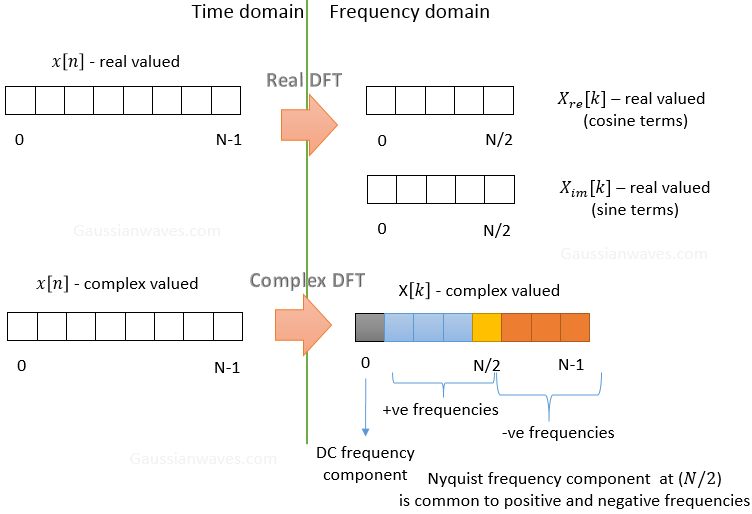

**FFT(Fast Fourier Transform)**

In [10]:
# FFT: algorithm for efficiently calculating the DFT.
# In its simplest implementation, parallel DFT computations are performed on the odd, even indexed samples of a record and the results are combined.

# If the number of samples taken for the computation is an integer power of 2, the DFT computation can be recursively performed, there by offering significant reductions in the computation time.
from scipy.fftpack import fft, ifft
X=fft(x,N) # compute X[k] : frequency domain
x=ifft(X,N) # compute x[n] : time domain

**Interpreting the FFT results**

Text(0, 0.5, '$x[n]$')

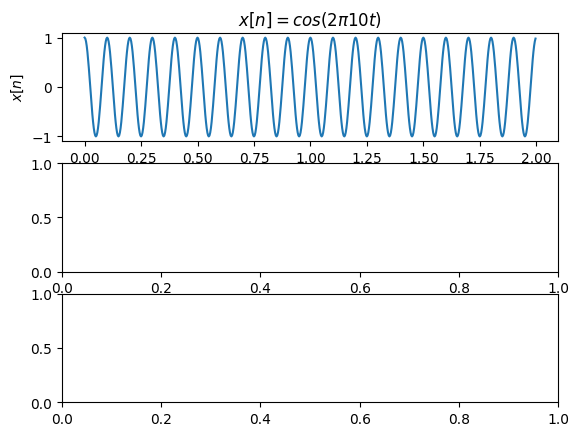

In [20]:
from scipy.fftpack import fft, ifft
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(formatter={"float_kind": lambda x: "%g" %x})

fc=10 # frequency of the carrier
fs=32*fc # sampling frequency with oversampling factor=32
t=np.arange(start=0, stop=2, step=1/fs) # 2 seconds duration
x=np.cos(2*np.pi*fc*t) # time domain signal (real number)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1) #, ax2, ax3)=plt.subplots(nrows=3, ncols=1)

ax1.plot(t,x) # plot the signal
ax1.set_title('$x[n] = cos(2 \pi 10 t)$')
ax1.set_xlabel('$t=nT_s$')
ax1.set_ylabel('$x[n]$')

In [16]:
N=256 # FFT size
X=fft(x,N) # N-point complex DFT, output contains DC at index 0
# nyquist frequency at N/2 the index positive frequencies from index 2 to N/2-1 and negative from index N/2 to N-1.

In [17]:
# The FFT length should be sufficient to cover the entire length of the input signal.
# If N is less than the length of the input signal, the input signal will be truncated when computing the FFT.
X[0] # approximately zero

(-1.2970126105269572e-14-0j)

**using frequency resolution, entire frequency axis**

In [23]:
df=fs/N # frequency resolution
sampleIndex= np.arange(start=0, stop=N) #raw index for FFT plot
f=sampleIndex * df

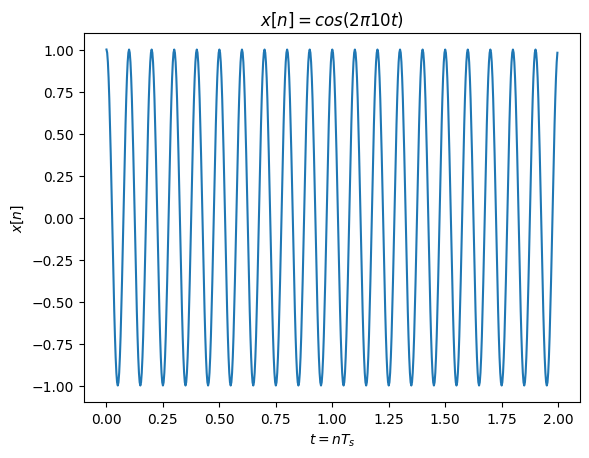

In [29]:
from scipy.fftpack import fft, ifft
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(formatter={"float_kind": lambda x: "%g" %x})

fc=10 # frequency of the carrier
fs=32*fc # sampling frequency with oversampling factor=32
t=np.arange(start=0, stop=2, step=1/fs) # 2 seconds duration
x=np.cos(2*np.pi*fc*t) # time domain signal (real number)

fig, (ax1) = plt.subplots(nrows=1, ncols=1) #, ax2, ax3)=plt.subplots(nrows=3, ncols=1)

ax1.plot(t,x) # plot the signal
ax1.set_title('$x[n] = cos(2 \pi 10 t)$')
ax1.set_xlabel('$t=nT_s$')
ax1.set_ylabel('$x[n]$')

fig.show()

In [26]:
nyquistIndex=N//2 # is for integer division
print(X[nyquistIndex-2:nyquistIndex+3, None])

[[-2.44612017e-14+4.30153638e-15j]
 [-1.88294828e-14+1.00269716e-14j]
 [-3.87273003e-14-0.00000000e+00j]
 [-1.88294828e-14-1.00269716e-14j]
 [-2.44612017e-14-4.30153638e-15j]]


<ipython-input-27-512e74830ed1>:13: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax2.stem(sampleIndex, abs(X), use_line_collection=True)
<ipython-input-27-512e74830ed1>:16: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax3.stem(f,abs(X),use_line_collection=True);


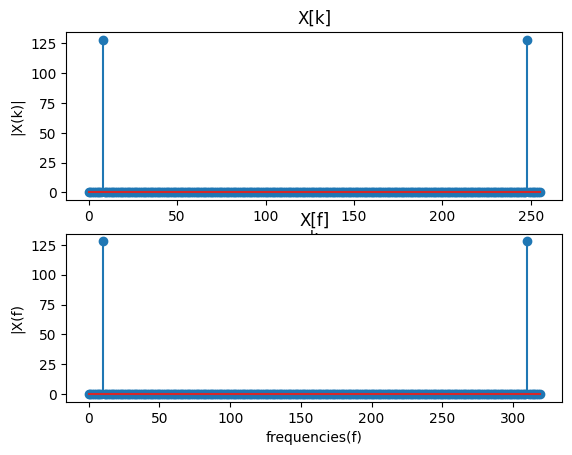

In [27]:
from scipy.fftpack import fft, ifft
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(formatter={"float_kind": lambda x: "%g" %x})

fc=10 # frequency of the carrier
fs=32*fc # sampling frequency with oversampling factor=32
t=np.arange(start=0, stop=2, step=1/fs) # 2 seconds duration
x=np.cos(2*np.pi*fc*t) # time domain signal (real number)

fig, (ax2, ax3) = plt.subplots(nrows=2, ncols=1) #, ax2, ax3)=plt.subplots(nrows=3, ncols=1)

ax2.stem(sampleIndex, abs(X), use_line_collection=True)
ax2.set_title('X[k]'); ax2.set_xlabel('k'); ax2.set_ylabel('|X(k)|');

ax3.stem(f,abs(X),use_line_collection=True);
ax3.set_title('X[f]'); ax3.set_xlabel('frequencies(f)'); ax3.set_ylabel('|X(f)');
fig.show()